**indexing the necessary dataframes and converting to nparrays**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#loading df
file = 'C:/Users/{kr.pA}/Downloads/methylated data/modified.csv'
df = pd.read_csv(file, sep = ',')

#editing df to desired format
df = df.transpose()

df.insert(416349, 416349, ['Patient Number','Patient 3 rep 1', 'Patient 3 rep 1','Patient 3 rep 1','Patient 3 rep 1','Patient 9','Patient 9','Patient 9','Patient 9','Patient 10','Patient 10',
             'Patient 11','Patient 11','Patient 11','Patient 11','Patient 12 rep 1','Patient 12 rep 1','Patient 14','Patient 14','Patient 14 rep 1','Patient 14 rep 1',
             'Patient 1','Patient 1','Patient 1','Patient 1','Patient 2','Patient 2','Patient 2','Patient 2','Patient 3','Patient 3',
             'Patient 3', 'Patient 3','Patient 4', 'Patient 4','Patient 4', 'Patient 4','Patient 7','Patient 7','Patient 7','Patient 7',
             'Patient 8','Patient 8','Patient 8','Patient 8','Patient 9','Patient 9','Patient 10','Patient 10','Patient 12','Patient 12',
             'Patient 14','Patient 14','Patient 15','Patient 15','Patient 15','Patient 15','Patient 16','Patient 16','Patient 16','Patient 16',
             'Patient 18','Patient 18','Patient 18','Patient 18','Patient 19','Patient 19','Patient 19','Patient 19','Patient 20','Patient 20',
             'Patient 20','Patient 20','Patient 21','Patient 21','Patient 21','Patient 21','Patient 22','Patient 22','Patient 22','Patient 22',
             'Patient 26','Patient 26','Patient 26','Patient 26','Patient 28','Patient 28','Patient 28','Patient 28','Patient 29','Patient 29',
             'Patient 29','Patient 29','Patient 29 rep 2','Patient 29 rep 2'], True) 

#populating a list of the genes and the patient number heading to rename the columns and initialize features list
genelist = list(df.iloc[0,0:])

features = genelist[:-1]
df.columns = genelist

#print(genelist)

df = df.drop(['ID_REF'], axis = 0)

#transform and create histograms out of nparray slicing

df_data = df.drop(['Patient Number'], axis =1)
npdata = df_data.to_numpy()

# need to separate out by methylated and unmethylated values
# we do this by deleting even and odd indices

meth = df_data.iloc[::2].to_numpy()
meth = meth.astype('float')
unmeth = df_data.iloc[1::2].to_numpy()
unmeth = unmeth.astype('float')


**creating histograms for separated (by methylation) and combined datasets using matplotlib**

untransformed methylated


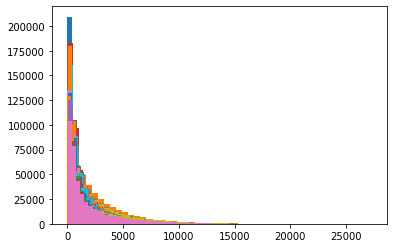

untransformed unmethylated


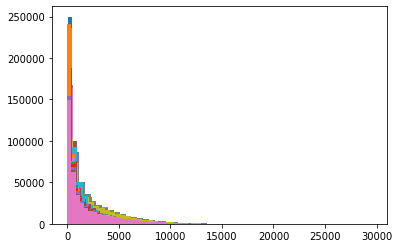

untransformed total


In [ ]:
#separated histograms
print("untransformed methylated")
for i in meth:
    plt.hist(i, bins = 50)
plt.show()

print("untransformed unmethylated")
for i in unmeth:
    plt.hist(i, bins = 50)
plt.show()

#combined graphs
print("untransformed total")
for i in npdata:
    plt.hist(i, bins = 50)
plt.show()

print("log transformed total")
for i in npdata:
    plt.hist(i, bins = 50, log = True)
plt.show()
    

**CHI SQUARED GOODNESS OF FIT**

In [6]:
from scipy.stats import chisquare
meth = meth.astype('float')
logmeth = np.log(meth)

chisquare(logmeth)


Power_divergenceResult(statistic=array([8.0964623 , 6.46194622, 2.44448826, ..., 3.60636022, 1.96020765,
       1.94855478]), pvalue=array([1., 1., 1., ..., 1., 1., 1.]))

**WELCH'S T-TEST**


In [22]:
import scipy
from scipy import stats
logunmeth = np.log(unmeth)
scipy.stats.ttest_ind(logmeth, logunmeth, equal_var = False)

Ttest_indResult(statistic=array([ -2.07250769,  -5.9978199 , -23.8977615 , ..., -18.80163008,
       -19.89798483, -18.05994256]), pvalue=array([4.17090305e-02, 3.92531927e-08, 4.25798422e-41, ...,
       7.28306434e-33, 8.37900054e-34, 2.15442785e-31]))

**USING SEABORN FOR VISUALIZATION**

In [ ]:
import seaborn as sns
sns.set()


# use kernel density estimation (smooth curves)

print("untransformed total")

for i in npdata:
    sns.kdeplot(i, shade=True)
    plt.xscale('log')
plt.show()

sns.kdeplot(df_data, shade = True)



In [46]:
#np.save("C:/Users/{kr.pA}/Downloads/methylated data",npdata)
#df_data.to_csv(r'C:/Users/{kr.pA}/Downloads/methylated data\df_data.csv')